In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

from gym_minigrid_navigation.utils import show_video
from train_worker import gen_env, get_agent, run_episode, run_episodes, get_goal_achieving_criterion

from rewards import get_reward_function
from utils import init_logger, switch_reproducibility_on, display_stats

init_logger('dqn')
init_logger('navigation_policy')
init_logger('gym_minigrid_navigation.environments')

### config 

In [4]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../conf/minigrid_dqn_navigation_mlp.hocon')
config['env']['video_path'] = './video/'

In [5]:
switch_reproducibility_on(config['seed'])

### environment 

In [6]:
reward_functions = get_reward_function(config)
goal_achieving_criterion = get_goal_achieving_criterion(config)
env = gen_env(config['env'], goal_achieving_criterion, reward_functions)

### agent 

In [7]:
from utils import init_logger

agent = get_agent(config)

2021-03-25 09:16:10,814 INFO    dqn                    : Running on device: cuda:0


### trainings 

In [8]:
scores, steps = run_episodes(env, agent, n_episodes=config['training.n_episodes'], verbose=config['training.verbose'])

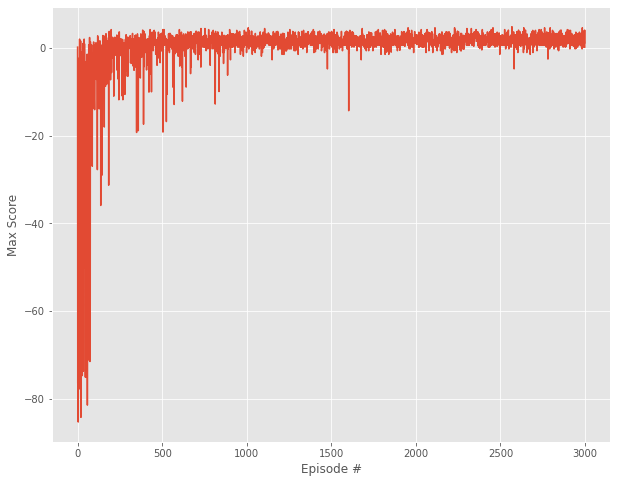

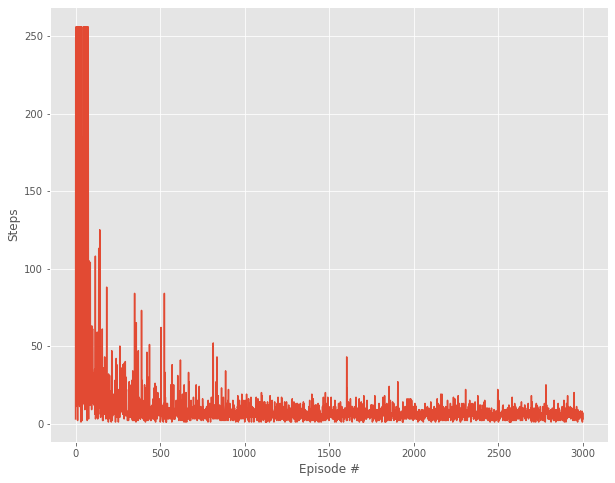

In [9]:
display_stats(scores, steps)

### visualisation 

In [11]:
from gym_minigrid_navigation import environments as minigrid_envs

env = gen_env(config['env'], goal_achieving_criterion, reward_functions, verbose = True)
env = minigrid_envs.visualisation_wrapper(env, config['env.video_path'])

print(run_episode(env, agent, train_mode=False))

2021-03-25 09:20:54,756 INFO    gym_minigrid_navigation.environments   : From [4 3] to [4 4]


(0.5857864376269049, 2, True)


In [12]:
show_video()